<head>
    <style>
        .md-typeset h2 {
            margin:0;
            }
        .md-typeset h3 {
            margin:0;
            }
        .jupyter-wrapper table.dataframe tr, .jupyter-wrapper table.dataframe th, .jupyter-wrapper table.dataframe td {
            text-align:left;
            }
        .jupyter-wrapper table.dataframe {
            table-layout: auto;
            }
        .jp-RenderedText pre {
            display: inline-block;
            overflow-x: auto;
            width: max-content;
        }
    </style>
</head>

# Lab 0 - Exploring data with Stata

In this lab, you would practice how to

* read Stata data file (.dta) into Stata either from local directory or online
* basic syntax and commands, such as `describe`, `summarize`, `drop`, `if`, `histogram`, etc.
* set up the working directory in Stata
* import non-Stata data files, such as text data (.csv) or Excel spreedsheet (.xlsx)

After this lab, you are expected

* to know where you should find your data that you want to anayze and read them into your Stata
* to know how to import data files in different formats, such as a csv or excel file
* to explore your dataset by finding
    * size of your sample, number of variables
    * mean, standard devation of variables
    * missing values or outliers
* to clean your dataset and save to use it latter

## Read online dataset into Stata anc check the dataset

* `use` loads into memory a Stata-format dataset
* `clear` clears memory before loading the data

In [1]:
use https://stats.idre.ucla.edu/stat/stata/notes/hsb2, clear

(highschool and beyond (200 cases))


After reading the dataset into Stata, we could use `describe` command to check the basic information of the dataset.

In [2]:
describe


Contains data from https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
  obs:           200                          highschool and beyond (200 cases)
 vars:            11                          17 Jun 2002 08:48
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
female          float   %9.0g      fl         
race            float   %12.0g     rl         
ses             float   %9.0g      sl         
schtyp          float   %9.0g      scl        type of school
prog            float   %9.0g      sel        type of program
read            float   %9.0g                 reading score
write           float   %9.0g                 writing score
math            float   %9.0g                 math score
science         float   %9.0g 

If you prefer looking at your data in a excel-like window, you can use `browse` command

In [1]:
browse

If the dataset is very large, it is better to check either the first 10 or the last 10 observations. 

* `list [variable_name1 variable_name2 or more] in f/10`

In [4]:
list female math in f/10


     +---------------+
     | female   math |
     |---------------|
  1. |   male     41 |
  2. | female     53 |
  3. |   male     54 |
  4. |   male     47 |
  5. |   male     57 |
     |---------------|
  6. |   male     51 |
  7. |   male     42 |
  8. |   male     45 |
  9. |   male     54 |
 10. |   male     52 |
     +---------------+


In [5]:
list write read math in -10/l


     +---------------------+
     | write   read   math |
     |---------------------|
191. |    54     42     41 |
192. |    57     36     42 |
193. |    52     50     53 |
194. |    59     41     42 |
195. |    65     47     60 |
     |---------------------|
196. |    59     55     52 |
197. |    46     42     38 |
198. |    41     57     57 |
199. |    62     55     58 |
200. |    65     63     65 |
     +---------------------+


## Descriptive statistic

To tell a strong from the dataset, we need to calculate the descriptive statistic for our dataset, such as the mean and standard deviation. Two commands are often used to get the descriptive statistic for the dataset:

* `summarize`: calculates and displays a variety of univariate summary statistics
* `tabulate`: calculates the frequency table for categorical variable

In [6]:
summarize write read math 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       write |        200      52.775    9.478586         31         67
        read |        200       52.23    10.25294         28         76
        math |        200      52.645    9.368448         33         75


In [7]:
summarize


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          id |        200       100.5    57.87918          1        200
      female |        200        .545    .4992205          0          1
        race |        200        3.43    1.039472          1          4
         ses |        200       2.055    .7242914          1          3
      schtyp |        200        1.16     .367526          1          2
-------------+---------------------------------------------------------
        prog |        200       2.025    .6904772          1          3
        read |        200       52.23    10.25294         28         76
       write |        200      52.775    9.478586         31         67
        math |        200      52.645    9.368448         33         75
     science |        200       51.85    9.900891         26         74
-------------+-------------------------------------------------

In [8]:
tabulate female


     female |      Freq.     Percent        Cum.
------------+-----------------------------------
       male |         91       45.50       45.50
     female |        109       54.50      100.00
------------+-----------------------------------
      Total |        200      100.00


In [9]:
tabulate female, summarize(read)


            |      Summary of reading score
     female |        Mean   Std. Dev.       Freq.
------------+------------------------------------
       male |   52.824176    10.50671          91
     female |   51.733945   10.057835         109
------------+------------------------------------
      Total |       52.23   10.252937         200


In [10]:
tabulate female, summarize(math)


            |        Summary of math score
     female |        Mean   Std. Dev.       Freq.
------------+------------------------------------
       male |   52.945055   9.6647845          91
     female |   52.394495   9.1510153         109
------------+------------------------------------
      Total |      52.645   9.3684478         200


In [11]:
tabulate race


        race |      Freq.     Percent        Cum.
-------------+-----------------------------------
    hispanic |         24       12.00       12.00
       asian |         11        5.50       17.50
african-amer |         20       10.00       27.50
       white |        145       72.50      100.00
-------------+-----------------------------------
       Total |        200      100.00


In [12]:
tabulate race, summarize(read)


            |      Summary of reading score
       race |        Mean   Std. Dev.       Freq.
------------+------------------------------------
   hispanic |   46.666667   10.239169          24
      asian |   51.909091   7.6609992          11
  african-a |        46.8   7.1200237          20
      white |   53.924138   10.276783         145
------------+------------------------------------
      Total |       52.23   10.252937         200


In [13]:
tabulate race, summarize(math)


            |        Summary of math score
       race |        Mean   Std. Dev.       Freq.
------------+------------------------------------
   hispanic |   47.416667    6.983936          24
      asian |   57.272727   10.120187          11
  african-a |       46.75   6.4878429          20
      white |   53.972414   9.3830113         145
------------+------------------------------------
      Total |      52.645   9.3684478         200


## Data visualization

Statistical summary tables are great and tell us a lot. However, a picture is worth a thousand words. To have a big picture of the dataset, especially for each variable, we could plot:

* `histogram`: draws the histogram of a variable and gives the distribution of data
* `graph box`: draws the box plot of a variable: A box plot is a type of plot that allows us to visualize the five-digit summary of a data set. These include: the minimum, the first quartile, the median, the third quartile, and the maximum
* `scatter`: gives the scatter plot of two variables

(bin=14, start=28, width=3.4285714)


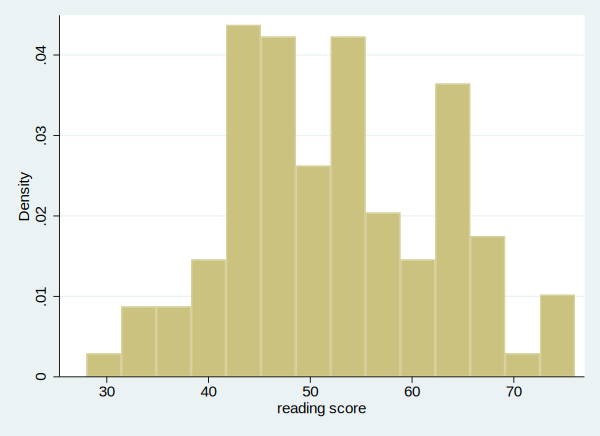

In [14]:
histogram read

(bin=14, start=28, width=3.4285714)


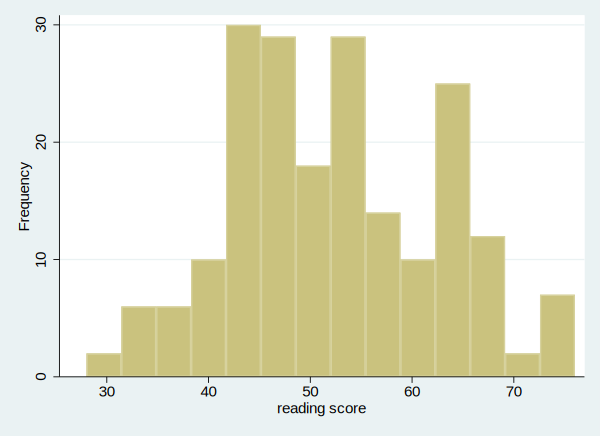

In [15]:
histogram read, frequency

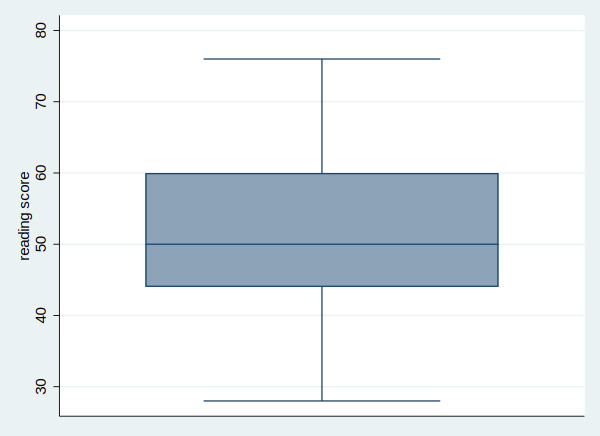

In [16]:
graph box read

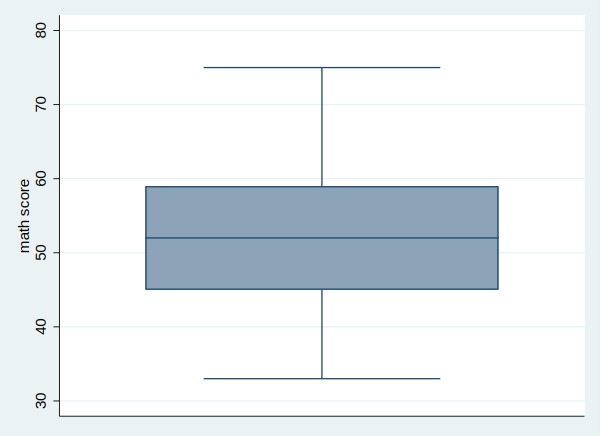

In [17]:
graph box math

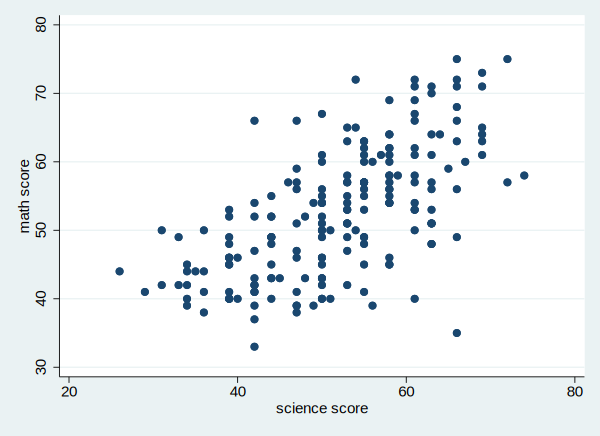

In [18]:
scatter math science

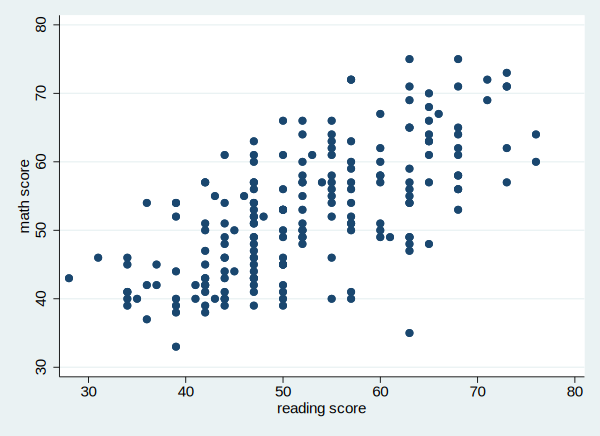

In [19]:
scatter math read

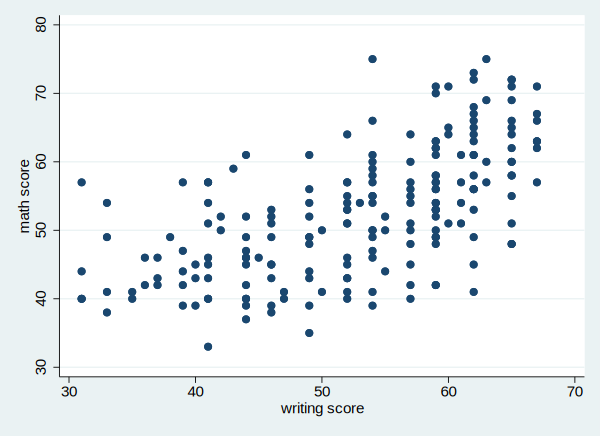

In [20]:
scatter math write

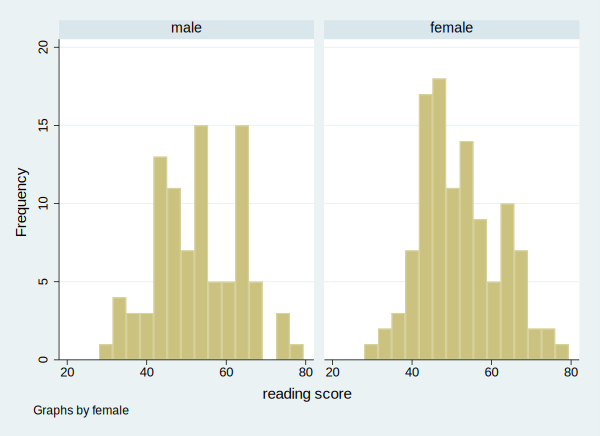

In [21]:
histogram read, frequency by(female)

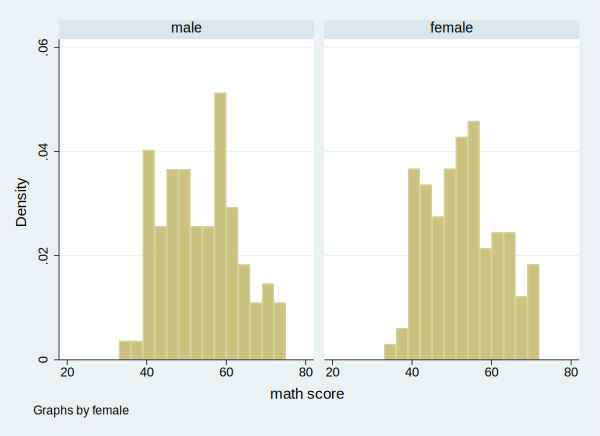

In [22]:
histogram math, by(female)

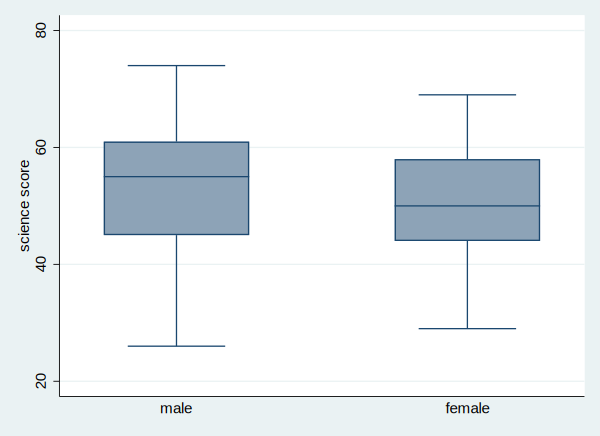

In [23]:
graph box science, over(female)

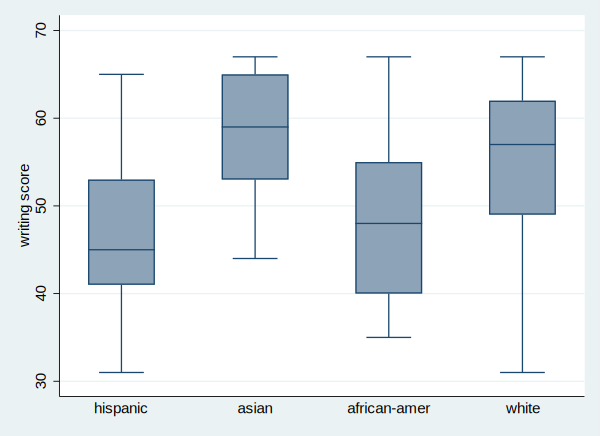

In [24]:
graph box write, over(race)

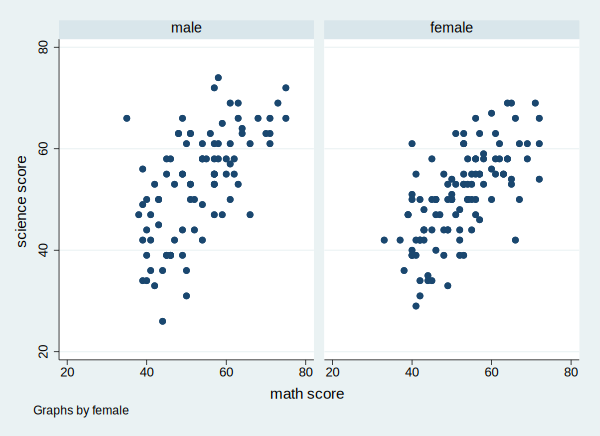

In [25]:
scatter science math, by(female)

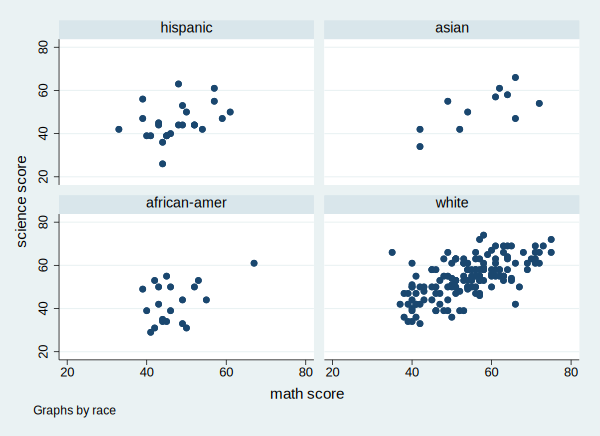

In [26]:
scatter science math, by(race)

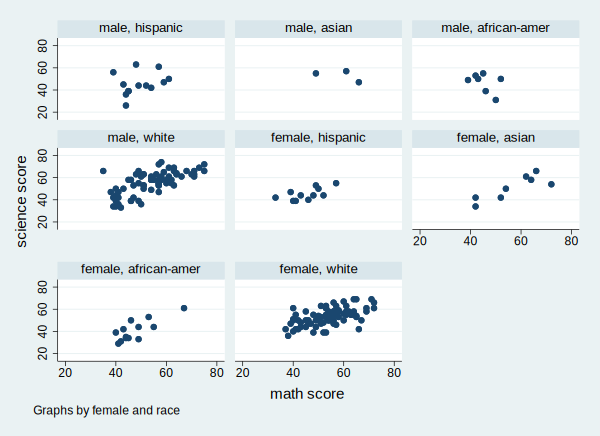

In [27]:
scatter science math, by(female race)

In [28]:
describe


Contains data from https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
  obs:           200                          highschool and beyond (200 cases)
 vars:            11                          17 Jun 2002 08:48
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
female          float   %9.0g      fl         
race            float   %12.0g     rl         
ses             float   %9.0g      sl         
schtyp          float   %9.0g      scl        type of school
prog            float   %9.0g      sel        type of program
read            float   %9.0g                 reading score
write           float   %9.0g                 writing score
math            float   %9.0g                 math score
science         float   %9.0g 

When we we have so many different variables, it is better to give them some labels for human beings to understand them. In Stata, we could use the following command:

* `label variable variable_name "information you want to add"` (do not forget " ")

In [29]:
label variable ses "Socio economic status of student's family, with levels low, middle, and high"

In [30]:
describe


Contains data from https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
  obs:           200                          highschool and beyond (200 cases)
 vars:            11                          17 Jun 2002 08:48
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
female          float   %9.0g      fl         
race            float   %12.0g     rl         
ses             float   %9.0g      sl         Socio economic status of student's
                                                family, with levels low, middle,
                                                and high
schtyp          float   %9.0g      scl        type of school
prog            float   %9.0g      sel        type of program
read            float   %9.0g      

In [31]:
label variable schtyp "Type of school, with levels public and private"

In [32]:
describe


Contains data from https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
  obs:           200                          highschool and beyond (200 cases)
 vars:            11                          17 Jun 2002 08:48
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
female          float   %9.0g      fl         
race            float   %12.0g     rl         
ses             float   %9.0g      sl         Socio economic status of student's
                                                family, with levels low, middle,
                                                and high
schtyp          float   %9.0g      scl        Type of school, with levels public
                                                and private
prog            f

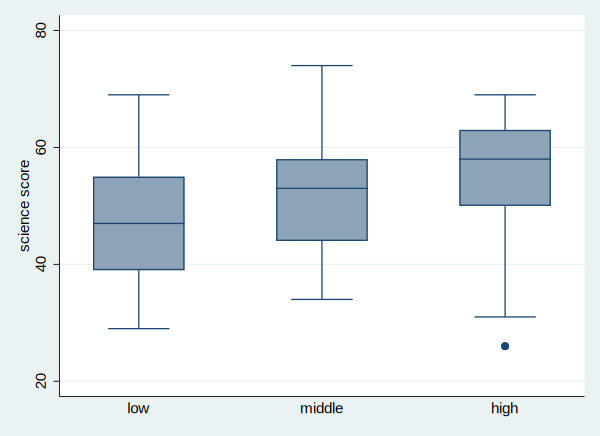

In [33]:
graph box science, over(ses)

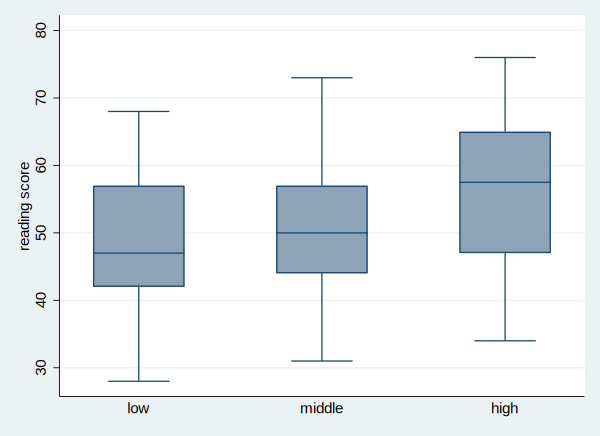

In [34]:
graph box read, over(ses)

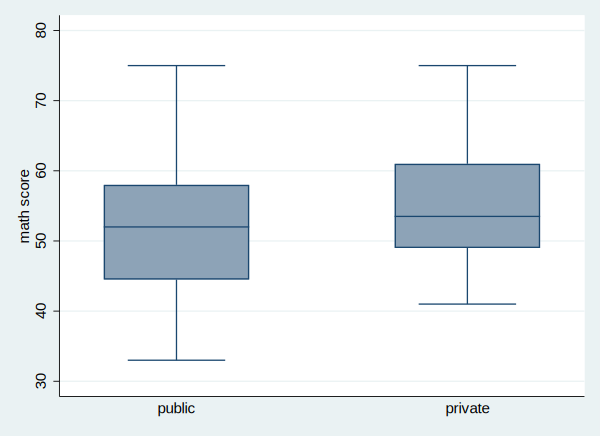

In [35]:
graph box math, over(schtyp)

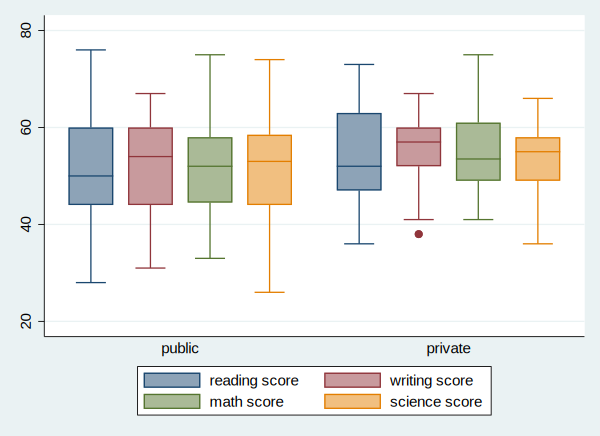

In [36]:
graph box read write math science, over(schtyp)

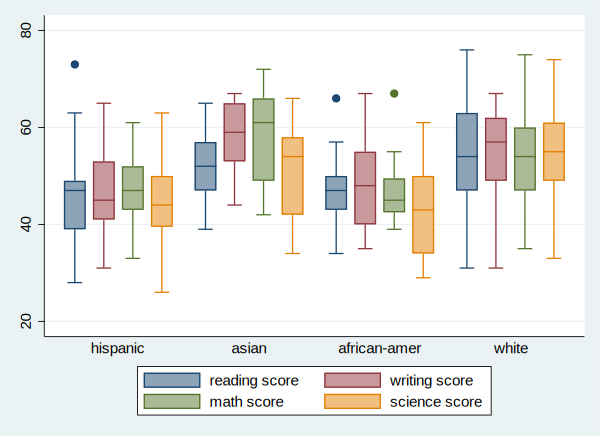

In [37]:
graph box read write math science, over(race)

__Take Away__:

* histogram and box plots can give us a very good picture on the distribution of data for continuous variables
* box plot also tells you whether you have an outlier or not 
* scatter plot gives us the relationship of tow variables
* when you want to compare the distribution or relationship across different categorical variables (such as gender, race, school types, or different types of firms, etc.), you can plot the histogram, box, or scatter over (or by) those categories. 
* data visualization can gives us lots of information, researchers normally do data exploration via visualization for finding interesting patterns or trends. 

<script>
    var div_svg = document.getElementsByClassName('jp-RenderedHTML')

    for (const element of div_svg) {
        var svg_str = element.childNodes[1].srcdoc 
        element.childNodes[1].srcdoc =  svg_str.replace(/width="600px"/i, "width=100%")
    }
</script>